In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from cmath import pi
from scipy import optimize
import scipy.stats
from matplotlib.patches import ConnectionPatch

# Plot Figure3

In [11]:
D_V_results_csv = './data/D_V_all.csv'
D_V_results = pd.read_csv(D_V_results_csv)
D_V_results['time'] = [i.split("_")[0] for i in D_V_results['time']]
D_V_results['time'] = pd.to_datetime(D_V_results['time'])

df_post = pd.DataFrame([], columns=['patient_id', 'post_D', 'post_V'])
df_pre = pd.DataFrame([], columns=['patient_id', 'pre_D', 'pre_V'])
sample_keys = list(set(list(D_V_results['patient_id'])))
for s in sample_keys:
    df_s = D_V_results[D_V_results['patient_id']==s]
    df_s = df_s.sort_values(by = 'time')
    df_s_pre = pd.DataFrame([[s, df_s.iloc[0]['original_shape_Maximum3DDiameter'], df_s.iloc[0]['original_shape_MeshVolume']]], columns=['patient_id', 'pre_D', 'pre_V'])
    df_pre = df_pre.append(df_s_pre)

    for i in range(1, df_s.shape[0]):
        df_s_post = pd.DataFrame([[s, df_s.iloc[i]['original_shape_Maximum3DDiameter'], df_s.iloc[i]['original_shape_MeshVolume']]], columns=['patient_id', 'post_D', 'post_V'])
        df_post = df_post.append(df_s_post)

df_pre = df_pre.reset_index(drop=True)
df_post = df_post.reset_index(drop=True)
df_post.columns = ['patient_id', 'D', 'V']
df_pre.columns = ['patient_id', 'D', 'V']
df = pd.concat([df_pre, df_post])
df = df.reset_index(drop=True)
print(df.shape)
print("Spearman")
print("D vs V", scipy.stats.spearmanr(df["D"], df["V"])[0])

(916, 3)
Spearman
D vs V 0.9222081721770257


A:  0.1446130179286677 ; B -2892.8906844667868
Spearman standard D vs V 1.0


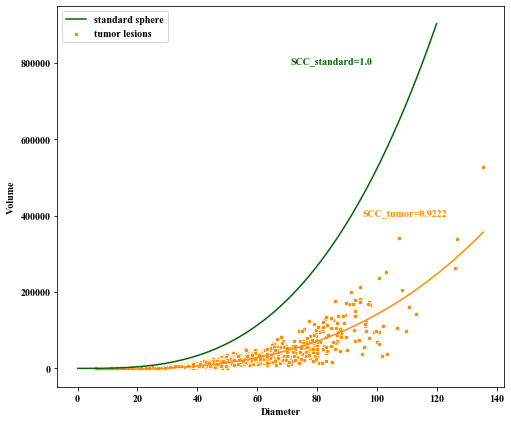

In [12]:
def fun(x, A, B):
    return A * x**3 + B
fig, ax = plt.subplots(1,1,figsize=(8,7))

x_D = df['D']
y_V = df['V']
A, B = optimize.curve_fit(fun, x_D, y_V)[0]
print("A: ", A, "; B", B)
xx_D = np.arange(np.min(x_D), np.max(x_D), 0.01) 
yy_V = A * xx_D**3 + B
sns.scatterplot(data = df, x="D", y="V", color = "darkorange", label='tumor lesions', s=20)
ax.plot(xx_D, yy_V, "darkorange")
x = np.arange(0, 120, 0.1)
y = (pi * x**3) / 6
ax.plot(x, y, "darkgreen", label = "standard sphere")
ax.legend()
ax.text(71,800000,'SCC_standard=1.0', color = "darkgreen")
ax.text(95,400000,'SCC_tumor=0.9222', color = "darkorange")
plt.xlabel("Diameter")
plt.ylabel("Volume")
plt.savefig("./figures/figure3.svg",  bbox_inches='tight', dpi=400)
print("Spearman standard D vs V",scipy.stats.spearmanr(x, y)[0])


# Plot Figure4

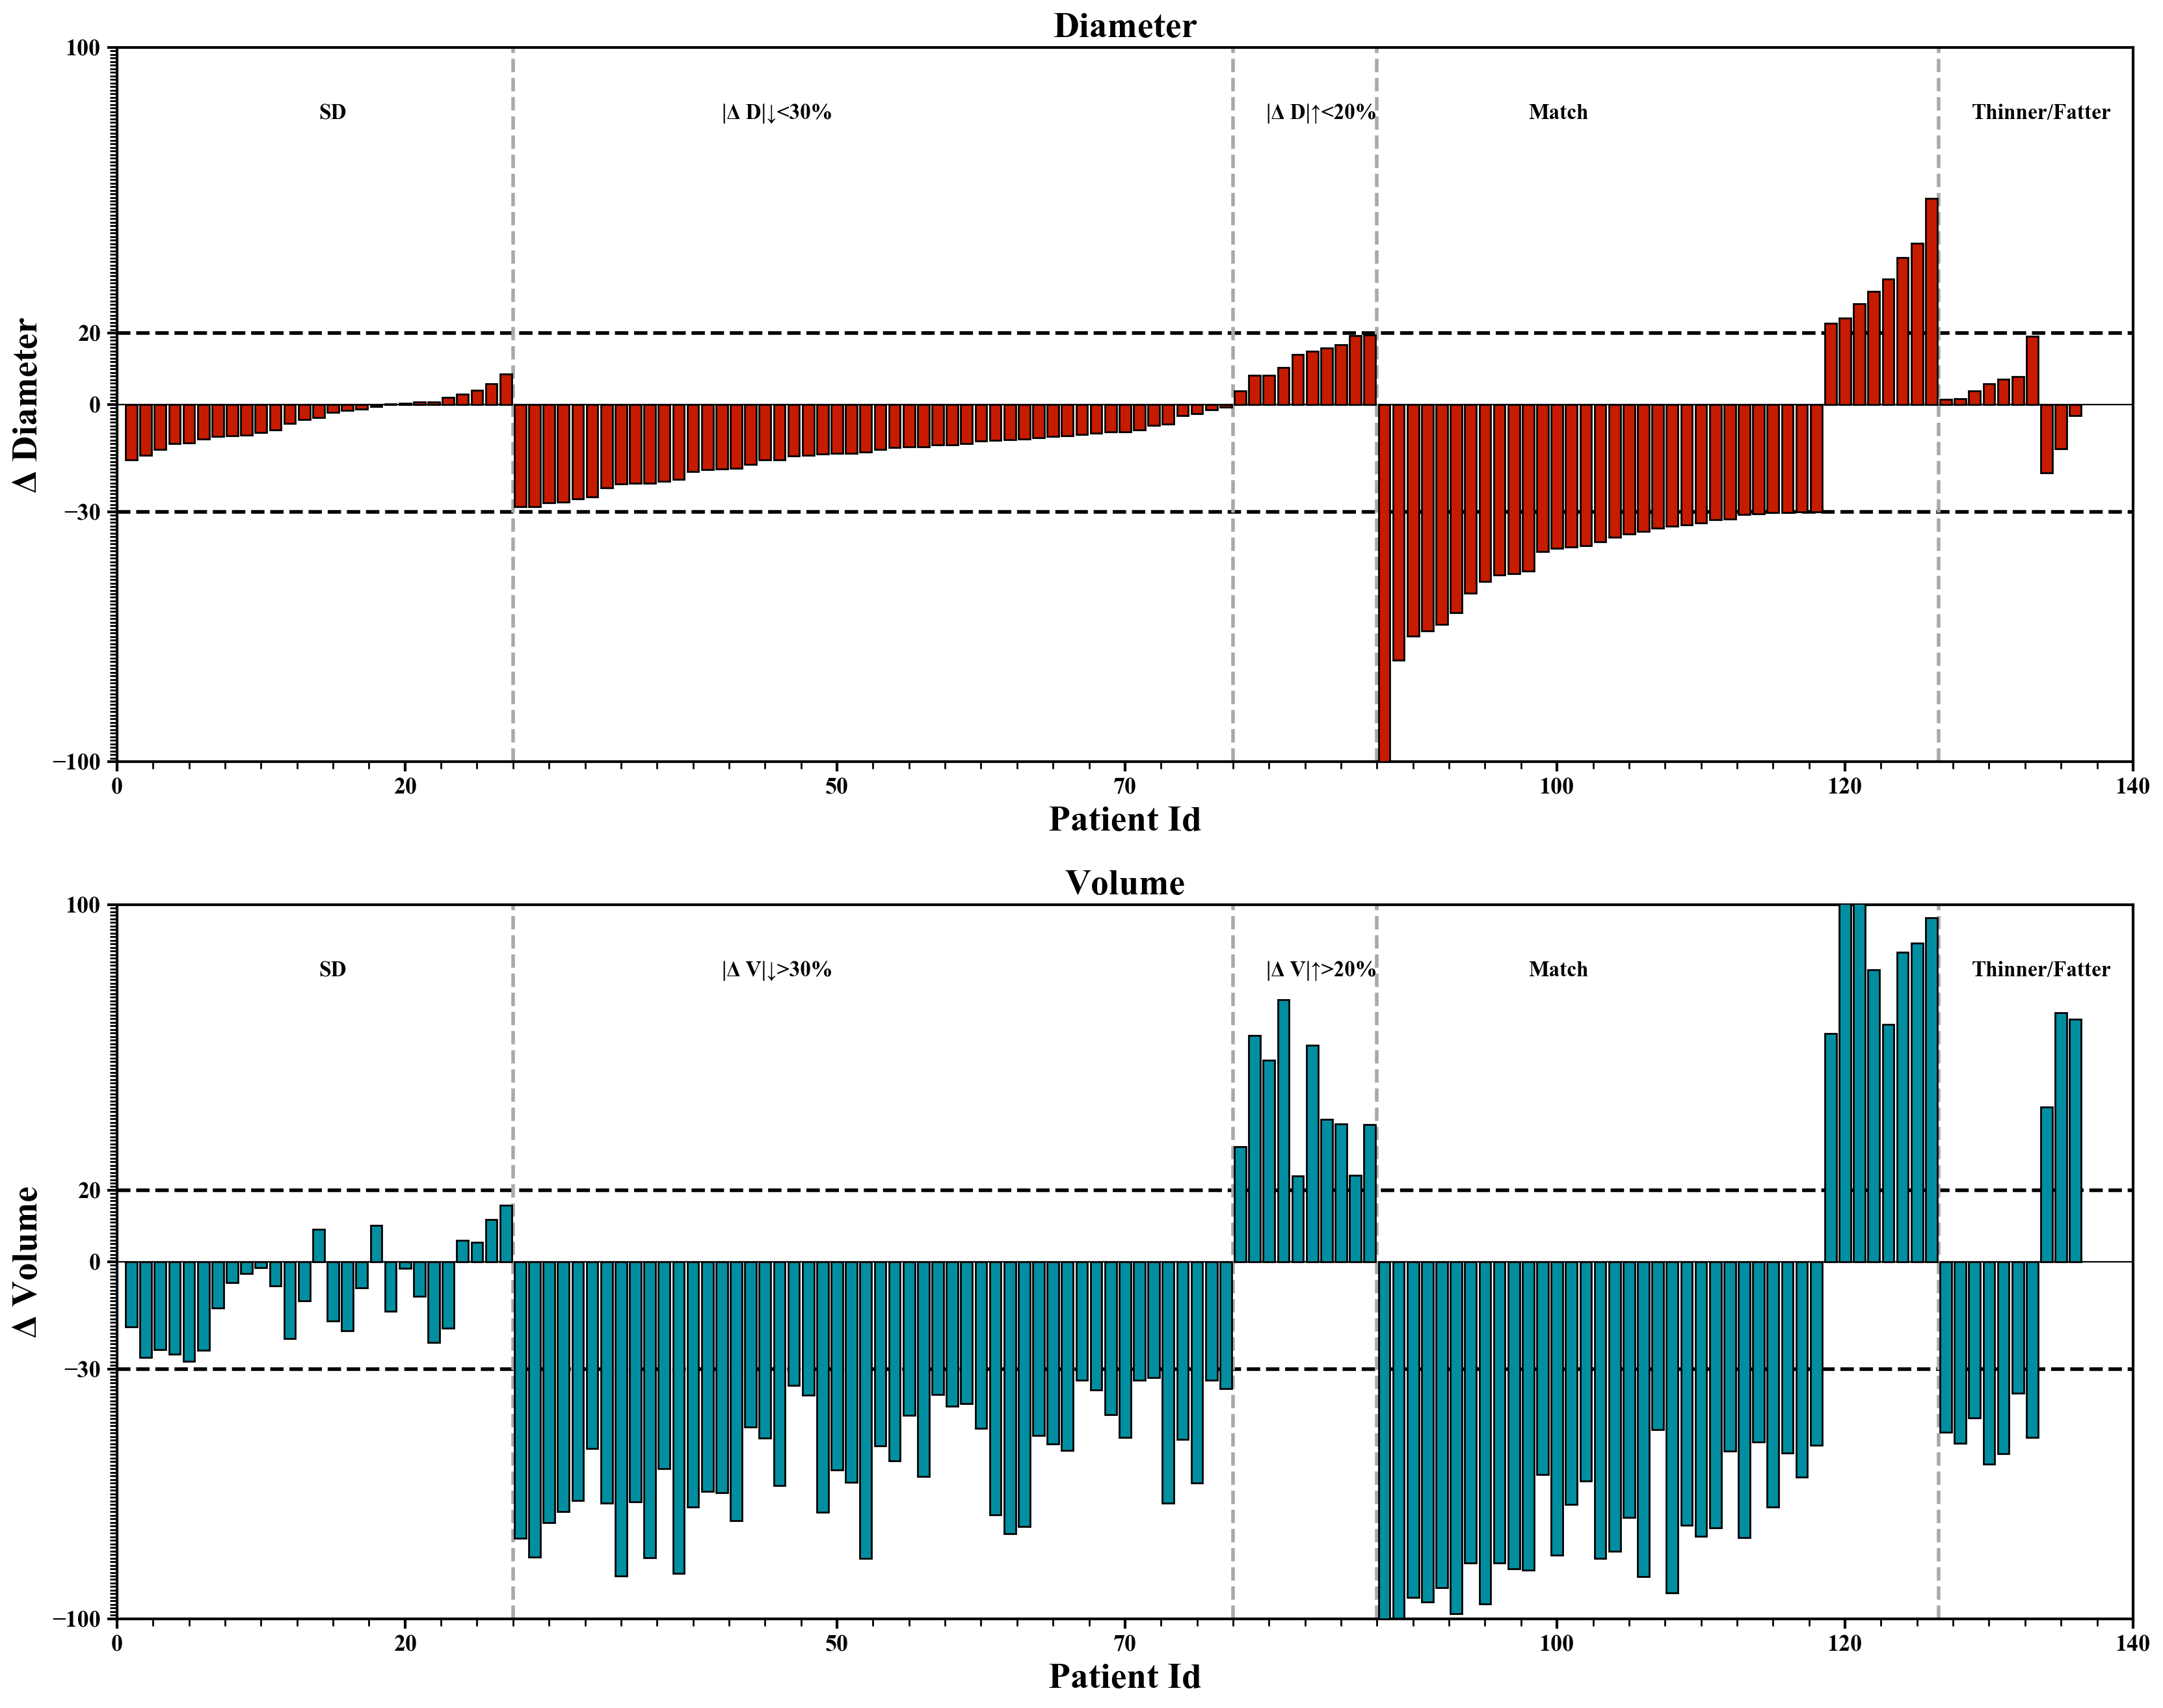

In [9]:
delta_res = pd.read_csv('./data/D_V_136patients.csv', encoding = 'gb2312')
patient_id_list = list(delta_res['patient_id'])
delta_D_list = list(delta_res['delta_D'])
delta_V_list = list(delta_res['delta_V'])

plt.rcParams['font.family'] = "Times New Roman"
from cProfile import label
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(2, 1, figsize=(20,16),dpi=200)
ax = axes.flatten()
position = np.arange(1,len(patient_id_list)+1)

ax[0].bar(position, delta_D_list, zorder=4,color='#C71B00', ec='k',lw=1, label='Δ Diameter')
ax[1].bar(position, delta_V_list, zorder=3,color='#018EA0', ec='k',lw=1, label='Δ Volume')

ax[0].axhline(y=0,color='k',lw=.8)
ax[0].axhline(y=20,color='k',lw=2.0, ls="--")
ax[0].axhline(y=-30,color='k',lw=2.0, ls="--")

ax[1].axhline(y=0,color='k',lw=.8)
ax[1].axhline(y=20,color='k',lw=2.0, ls="--")
ax[1].axhline(y=-30,color='k',lw=2.0, ls="--")

for spine in ['bottom','left','right','top']:
    ax[0].spines[spine].set_linewidth(1.5)
    ax[1].spines[spine].set_linewidth(1.5)
ax[0].set_yticks([-100, -30, 0, 20, 100]) 
ax[0].set_ylim(bottom=-100,top=100)
ax[0].set_xlim(left=0,right=100)
ax[0].set_xticks([0, 20, 50, 70, 100, 120, 140])

ax[1].set_yticks([-100, -30, 0, 20, 100]) 
ax[1].set_ylim(bottom=-100,top=100)
ax[1].set_xlim(left=0,right=100)
ax[1].set_xticks([0, 20, 50, 70, 100, 120, 140])

yminorLocator = MultipleLocator(1) 
xminorLocator = MultipleLocator(2.5)
ax[0].yaxis.set_minor_locator(yminorLocator)
ax[0].xaxis.set_minor_locator(xminorLocator)
ax[0].tick_params(which='major',direction='out',labelsize=13,length=5.5,width=1.5)
ax[0].tick_params(which='minor',direction='out',length=4,width=1)

ax[1].yaxis.set_minor_locator(yminorLocator)
ax[1].xaxis.set_minor_locator(xminorLocator)
ax[1].tick_params(which='major',direction='out',labelsize=13,length=5.5,width=1.5)
ax[1].tick_params(which='minor',direction='out',length=4,width=1)

text_font = {'size':'20','weight':'bold','color':'black'}
ax[0].set_title("Diameter", text_font)
ax[0].set_ylabel("Δ Diameter", text_font)
ax[0].set_xlabel("Patient Id", text_font)
ax[1].set_title("Volume", text_font)
ax[1].set_ylabel("Δ Volume", text_font)
ax[1].set_xlabel("Patient Id", text_font)

text_font = {'size':'12','weight':'bold','color':'black'}
ax[0].axvline(x=27.5,color='#A9A9A9',lw=2.0, ls="--")
ax[1].axvline(x=27.5,color='#A9A9A9',lw=2.0, ls="--")
ax[0].text(0.1,0.9,"SD",transform = ax[0].transAxes,fontdict=text_font,zorder=4)
ax[1].text(0.1,0.9,"SD",transform = ax[1].transAxes,fontdict=text_font,zorder=4)

ax[0].axvline(x=77.5,color='#A9A9A9',lw=2.0, ls="--")
ax[1].axvline(x=77.5,color='#A9A9A9',lw=2.0, ls="--")
ax[0].text(0.3,0.9,"|Δ D|↓<30%",transform = ax[0].transAxes,fontdict=text_font,zorder=4)
ax[1].text(0.3,0.9,"|Δ V|↓>30%",transform = ax[1].transAxes,fontdict=text_font,zorder=4)

ax[0].axvline(x=87.5,color='#A9A9A9',lw=2.0, ls="--")
ax[1].axvline(x=87.5,color='#A9A9A9',lw=2.0, ls="--")
ax[0].text(0.57,0.9,"|Δ D|↑<20%",transform = ax[0].transAxes,fontdict=text_font,zorder=4)
ax[1].text(0.57,0.9,"|Δ V|↑>20%",transform = ax[1].transAxes,fontdict=text_font,zorder=4)

ax[0].axvline(x=126.5,color='#A9A9A9',lw=2.0, ls="--")
ax[1].axvline(x=126.5,color='#A9A9A9',lw=2.0, ls="--")
ax[0].text(0.7,0.9,"Match",transform = ax[0].transAxes,fontdict=text_font,zorder=4)
ax[1].text(0.7,0.9,"Match",transform = ax[1].transAxes,fontdict=text_font,zorder=4)

ax[0].text(0.92,0.9,"Thinner/Fatter",transform = ax[0].transAxes,fontdict=text_font,zorder=4)
ax[1].text(0.92,0.9,"Thinner/Fatter",transform = ax[1].transAxes,fontdict=text_font,zorder=4)
plt.savefig('./figures/figure4.svg', dpi=900,bbox_inches='tight')